# High Performance Linpack

Results from running the [standard](https://www.netlib.org/benchmark/hpl/) and [Intel](https://software.intel.com/content/www/us/en/develop/documentation/mkl-windows-developer-guide/top/intel-math-kernel-library-benchmarks/intel-distribution-for-linpack-benchmark/overview-of-the-intel-distribution-for-linpack-benchmark.html) versions of the High Performance Linkpack benchmarks.

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes
Each benchmark is run on both a single node and all nodes. Each run uses as many mpi tasks (processes) per node as there are physical cores.

The plots show results for the most-recent run on each system/partition/environment combination. They show the Gflops/s vs. the number of nodes used for each run. Higher values are better performance.

Hpl_single:


case,alaska:ib-gcc7-openmpi4-ucx,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc7-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,,,
1,834.12,821.71,752.95,856.12


AttributeError: 'NoneType' object has no attribute 'loc'

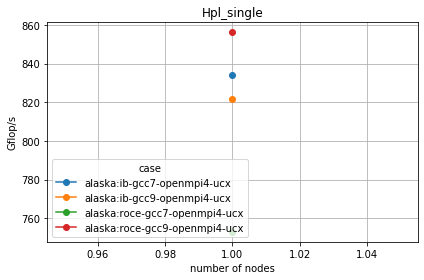

In [5]:
for test in ['Hpl_single', 'Hpl_all']:
    df = modules.utils.tabulate_last_perf(test, 'num_nodes', 'Gflops')
    print('%s:' % test)
    display(HTML(df.to_html()))
    ax = df.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('Gflop/s')
    ax.set_title(test)
    plt.tight_layout()

# Performance History

The plot below shows the Gflop/s history with a series for each system/partition/environment combination. Where performance logs include a git reference (as a tag `"git=<ref>"`) this is used to annotate the data point.

Hpl_all: no performance logs found


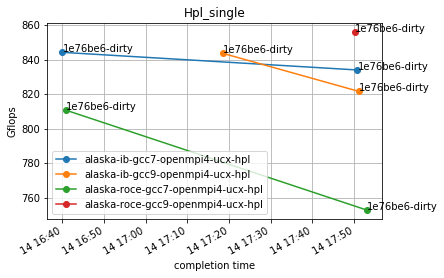

In [37]:
for test in ['Hpl_single', 'Hpl_all']:
    perf_records = modules.utils.load_perf_logs('../../perflogs', test, '.log')
    if perf_records is None:
        print('%s: no performance logs found' % test)
        continue
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
        # filter to only Gflops records (might have others)
        data = data.loc[data['perf_var'] == 'Gflops']
        data.plot(ax=ax, x='completion_time', y='perf_value', style=['o-'], label='-'.join(spe))
        
        # annotate points with git_ref:
        for x, y, ref in zip(data['completion_time'], data['perf_value'], data['git']):
            if not pd.isnull(ref):
                ax.annotate(ref, (x, y))
    ax.set_title(test)
    ax.set_xlabel('completion time')
    ax.set_ylabel('Gflops')
    ax.legend()
    ax.grid()    